# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [88]:
#Write your code here, You may need to use python open() function to open the file and load data.
import json
import pandas as pd
import matplotlib.pyplot as plt

data = open('/content/yearinfo.json')
yearinfo = json.load(data)
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [89]:
#checking the type of new_dict
print(type(yearinfo))

<class 'dict'>


In [90]:
# Now print the keys inside the json file
for key in yearinfo:
    print(key)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [91]:
# To check the number of songs in 2012
len(yearinfo['2012'])

100

In [92]:
# print column names inside each year
yearinfo['2012'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [93]:
# Check out the format of each values
yearinfo['2012'][0].values()

dict_values([['Gotye', 'Kimbra'], ['/wiki/Somebody_That_I_Used_to_Know'], ['Somebody That I Used to Know'], 1, '"Somebody That I Used to Know"', ['/wiki/Gotye', '/wiki/Kimbra']])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [94]:
#write your code here
# Prepare a column names so that we can use it for the DataFrame, which is all the keys and also add the year in the list
column = list(yearinfo['2012'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

In [95]:
# Stores the values in the a new list along with the year
dlist = []
for key, value in yearinfo.items():
    for i in value:
        data = list(i.values())+[key]
        dlist.append(data)
print(dlist)

[[['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha'], '2010'], [['Lady Antebellum'], ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], ['Need You Now (Lady Antebellum song)'], 2, '"Need You Now"', ['/wiki/Lady_Antebellum'], '2010'], [['Train (band)'], ['/wiki/Hey,_Soul_Sister'], ['Hey, Soul Sister'], 3, '"Hey, Soul Sister"', ['/wiki/Train_(band)'], '2010'], [['Katy Perry', 'Snoop Dogg'], ['/wiki/California_Gurls'], ['California Gurls'], 4, '"California Gurls"', ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg'], '2010'], [['Usher (musician)', 'Will.i.am'], ['/wiki/OMG_(Usher_song)'], ['OMG (Usher song)'], 5, '"OMG"', ['/wiki/Usher_(musician)', '/wiki/Will.i.am'], '2010'], [['B.o.B', 'Hayley Williams'], ['/wiki/Airplanes_(song)'], ['Airplanes (song)'], 6, '"Airplanes"', ['/wiki/B.o.B', '/wiki/Hayley_Williams'], '2010'], [['Eminem', 'Rihanna'], ['/wiki/Love_the_Way_You_Lie'], ['Love the Way You Lie'], 7, '"Love the Way You Lie"', ['/wiki/Eminem', '/wiki/Rihanna']

In [96]:
# DataFrame
df = pd.DataFrame(dlist,columns=column)

In [97]:
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [131]:
df.isna().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
score          0
dtype: int64

In [98]:
# Getting the first band_singer
df.band_singer[0][0]

'Kesha'

In [99]:
# data types
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [100]:
# Changing data type of year 
df = df.astype({'year': 'int64'})
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [101]:
# Removing the brackets from the list

# function that returns the value from a list 
def get_name(list_name):
    value = list_name[0]
    return value

# Store the values in tabular 
df['band_singer'] = df.band_singer.map(get_name)
df['song'] = df.song.map(get_name)
df['songurl'] = df.songurl.map(get_name)
df['url'] = df.url.map(get_name)

In [102]:
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [114]:
#Write your program and plot bar graph
# Returning the series containing unique rows in DataFrame in an ascending order 
df1 = df.value_counts(subset=['band_singer'], ascending=False)
df1


band_singer      
Drake (musician)     26
Maroon 5             21
Rihanna              21
Ariana Grande        20
Taylor Swift         19
                     ..
Duncan Laurence       1
Dr. Dre               1
Donald Glover         1
Mike Will Made It     1
Kris Allen            1
Length: 436, dtype: int64

In [115]:
# To return singers who have appeared more than 15 times
new_df = df1.loc[lambda x : x > 15]
new_df


band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

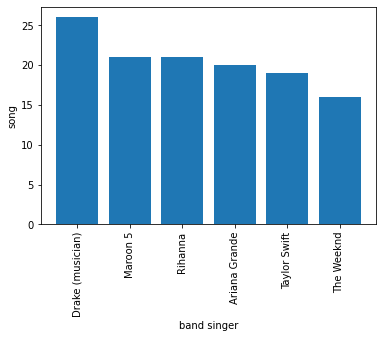

In [116]:
# Plotting the most prolific singers which appeared more than 15 times. 
y = df.band_singer.value_counts().loc[lambda x : x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**

Answer: From above analysis, we can conclude that the singer Drake(musician) is the most profilic singer with 26 songs.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [117]:
# write your code here
# assigning each song a score 101 - ranking
df['score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [118]:
# datatypes
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
score           int64
dtype: object

In [132]:
# adding the total score of the singer
singerScore = {}

for singer, songs in df.groupby('band_singer'):
    singerScore[singer] = songs.score.sum()

singerScore

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


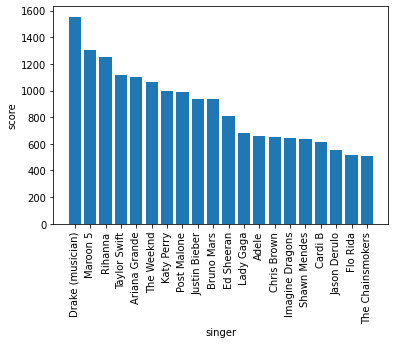

In [120]:
# Visualization of the singers considering their total score of top 20
y = pd.Series(data=singerScore, index=singerScore.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Yes, the difference can be noticed in position of the singers from that the 4th place as the name of the singers is shifted. This changes occured due to label as the first graph lable was base on number of appearence of the singer's name whereas second graph it was base on the totle score of a singer.

## Part 2: Using group properties

> 



Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [124]:
len(df.groupby('year'))

12

In [126]:
# the highest ranked song in each yearGroup is printed
for key, value in df.groupby('year'):
    rank_df = value[value.ranking == value.ranking.max()]
    print(rank_df.song, rank_df.year)

99    /wiki/Lover,_Lover
Name: song, dtype: object 99    2010
Name: year, dtype: int64
199    /wiki/My_Last
Name: song, dtype: object 199    2011
Name: year, dtype: int64
299    /wiki/Burn_It_Down_(Linkin_Park_song)
Name: song, dtype: object 299    2012
Name: year, dtype: int64
399    /wiki/Still_Into_You
Name: song, dtype: object 399    2013
Name: year, dtype: int64
499    /wiki/Adore_You_(Miley_Cyrus_song)
Name: song, dtype: object 499    2014
Name: year, dtype: int64
599    /wiki/How_Deep_Is_Your_Love_(Calvin_Harris_and...
Name: song, dtype: object 599    2015
Name: year, dtype: int64
699    /wiki/Perfect_(One_Direction_song)
Name: song, dtype: object 699    2016
Name: year, dtype: int64
799    /wiki/The_Fighter_(Keith_Urban_song)
Name: song, dtype: object 799    2017
Name: year, dtype: int64
899    /wiki/Believer_(Imagine_Dragons_song)
Name: song, dtype: object 899    2018
Name: year, dtype: int64
999    /wiki/Robbery_(Juice_Wrld_song)
Name: song, dtype: object 999    2019
Name: ye

## SUBMISSION DATE: 2nd April 2022 